# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.426032e+01     1.400446e+01
 * time: 0.005487918853759766
     1     6.246666e+01     9.398404e+00
 * time: 0.014784097671508789
     2     5.514525e+01     1.258487e+01
 * time: 0.1418149471282959
     3     4.144484e+01     9.133167e+00
 * time: 0.173659086227417
     4     3.254137e+01     8.304609e+00
 * time: 0.20742297172546387
     5     1.381709e+01     2.941200e+00
 * time: 0.24130892753601074
     6     1.052489e+01     3.650751e+00
 * time: 0.26537203788757324
     7     9.095093e+00     2.230225e+00
 * time: 0.28674912452697754
     8     9.071893e+00     6.439205e+00
 * time: 0.36080193519592285
     9     8.093442e+00     3.722777e+00
 * time: 0.3811979293823242
    10     7.896411e+00     5.363994e+00
 * time: 0.40064311027526855
    11     7.355244e+00     4.161515e+00
 * time: 0.42162299156188965
    12     6.690763e+00     2.591250e+00
 * time: 0.43961596488952637
    13     6.236717e+00     2.030262e+00
 * time: 0

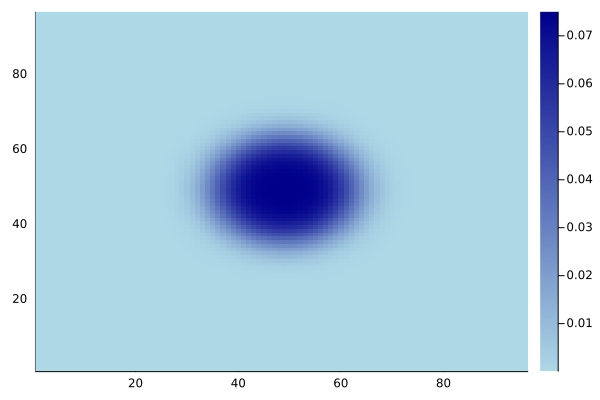

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))